# Лабораторная работа №1. Первичный анализ данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sample = pd.read_csv("var5.txt", sep = " ", header = None, names = ['values'])
original_sample = sample['values'].copy()

In [5]:
n = original_sample.size

## Визуализация

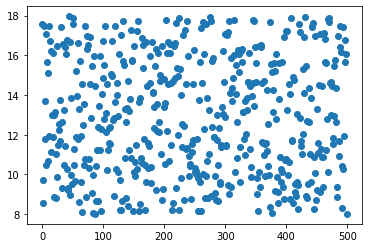

In [32]:
plt.scatter(y = original_sample, x = list(range(0, n)));

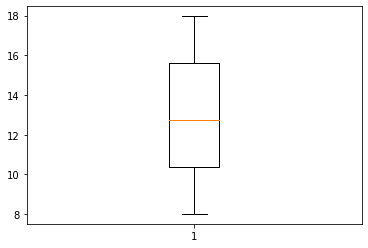

In [7]:
plt.boxplot(original_sample);

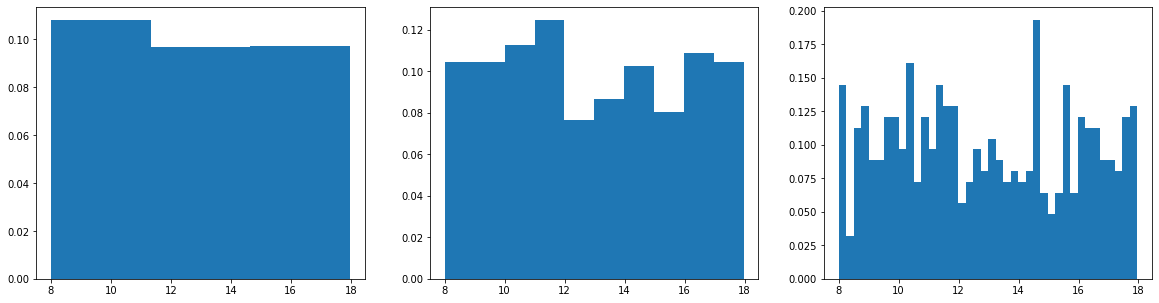

In [8]:
fig, axs = plt.subplots(1,3, figsize = (20,5))
axs[0].hist(original_sample, bins = 3, density = True);
axs[1].hist(original_sample, bins = 'auto', density = True);
axs[2].hist(original_sample, bins = 40, density = True);

## Числовые характеристики

In [9]:
def num_characteristics(sample):
    stats = sample.describe()
    stats.loc['var'] = sample.var()
    stats.loc['skew'] = sample.skew()
    stats.loc['kurt'] = sample.kurtosis()
    return stats

In [15]:
stats = num_characteristics(original_sample)
pd.DataFrame(stats)

,values
count,500.000000
mean,12.913284
std,2.925862
min,8.015208
25%,10.382975
50%,12.749840
75%,15.608335
max,17.963810
var,8.560666
skew,0.081794


## Проверка правила 3σ

In [9]:
x = stats.loc['mean']
s = stats.loc['std']

result = sample.query('values >= @x - 3 * @s & values <= @x + 3 * @s').count() / n
print('Доля наблюдений, которые попали в интервал, равна: {:.0%}'.format(result['values']))

Доля наблюдений, которые попали в интервал, равна: 100%


Теоретическая вероятность: $$ P \left\{ \xi \in [\mu - 3\sigma, \mu + 3\sigma] \right\} \geq \frac{8}{9} $$
Поскольку практическая вероятность $$ P \left\{ \xi \in [\overline x - 3s, \overline x + 3s] \right\} = 1 $$
То можно сделать вывод, что практический результат согласуется с теорией.

## Работа с пропусками

***Случайным образом внесем в выборку пропуски (доля которых составляет 0.25)***

In [18]:
sample['values'] = sample['values'].sample(frac = 0.75)

In [19]:
new_stats = num_characteristics(sample)
pd.DataFrame(new_stats)

,values
count,375.000000
mean,12.993180
std,2.935000
min,8.015208
25%,10.431245
50%,12.980170
75%,15.669075
max,17.963810
var,8.614227
skew,0.032315


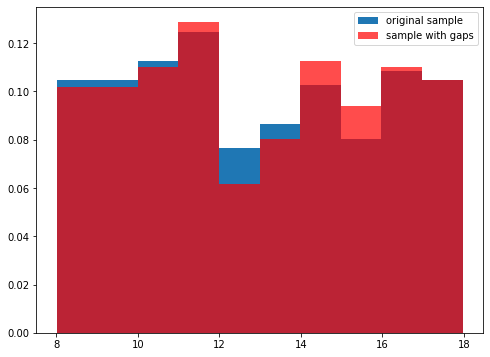

In [20]:
plt.figure(figsize = (8,6))
plt.hist(original_sample, bins = 'auto', alpha = 1.0, label = 'original sample', density = True)
plt.hist(sample, bins = 'auto', alpha = 0.7, color = 'red', label = 'sample with gaps', density = True)
plt.legend(loc = 'upper right');

***Заполним пропуски средним арифметическим по присутствующим данным***

In [21]:
sample_with_mean_values = sample.fillna(sample.mean());

In [22]:
new_stats_after_added_mean = num_characteristics(sample_with_mean_values)
pd.DataFrame(new_stats_after_added_mean)

,values
count,500.000000
mean,12.993180
std,2.540936
min,8.015208
25%,11.164272
50%,12.993180
75%,14.664523
max,17.963810
var,6.456354
skew,0.037276


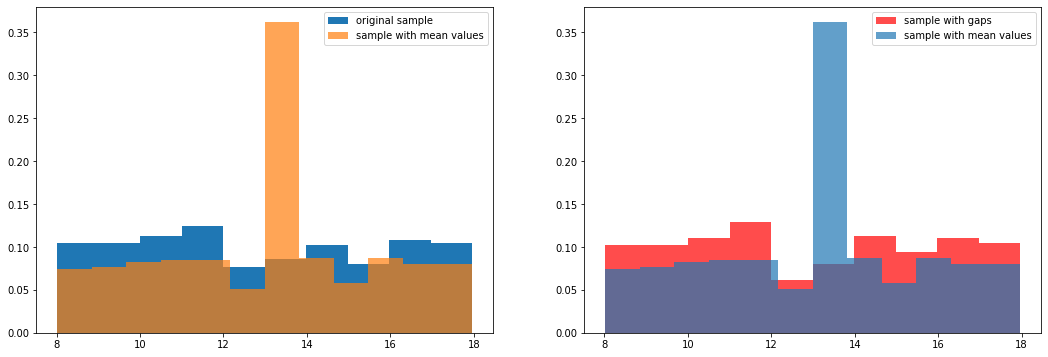

In [23]:
fig, axs = plt.subplots(1,2, figsize = (18,6))

axs[0].hist(original_sample, bins = 'auto', alpha = 1.0, label = 'original sample', density = True)
axs[0].hist(sample_with_mean_values, bins = 'auto', alpha = 0.7, label = 'sample with mean values', density = True)
axs[0].legend(loc = 'upper right');

axs[1].hist(sample, bins = 'auto', alpha = 0.7, color = 'red', label = 'sample with gaps', density = True)
axs[1].hist(sample_with_mean_values, bins = 'auto', alpha = 0.7, label = 'sample with mean values', density = True)
axs[1].legend(loc = 'upper right');

## Цензурирование данных снизу

In [3]:
sample = original_sample.copy()
c = (1/3) * sample.max() + (2/3) * sample.min()

***Все значения, меньшие c - уровня цензурирования, заменяем на пропуски***

In [4]:
sample = sample.to_frame()
sample.loc[sample['values'] < c, 'values'] = np.NaN

In [26]:
cens_stats = num_characteristics(sample)
pd.DataFrame(cens_stats)

,values
count,321.000000
mean,14.692729
std,1.991897
min,11.365550
25%,12.980170
50%,14.662480
75%,16.434790
max,17.963810
var,3.967654
skew,-0.071218


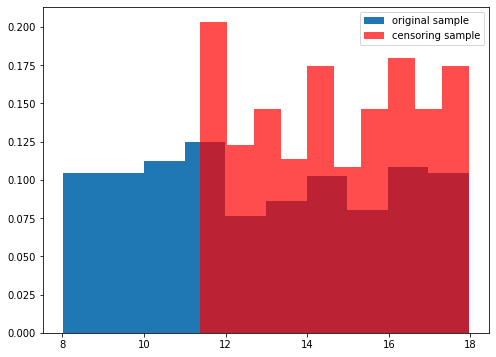

In [27]:
plt.figure(figsize = (8,6))
plt.hist(original_sample, bins = 'auto', alpha = 1.0, label = 'original sample', density = True)
plt.hist(sample, bins = 'auto', alpha = 0.7, color = 'red', label = 'censoring sample', density = True)
plt.legend(loc = 'upper right');

***Заполним пропуски средним арифметическим по присутствующим данным***

In [28]:
cens_sample_with_mean_values = sample.fillna(sample.mean());

In [29]:
new_cens_stats = num_characteristics(cens_sample_with_mean_values)
pd.DataFrame(new_cens_stats)

,values
count,500.000000
mean,14.692729
std,1.595114
min,11.365550
25%,14.008727
50%,14.692729
75%,15.608335
max,17.963810
var,2.544388
skew,-0.088734


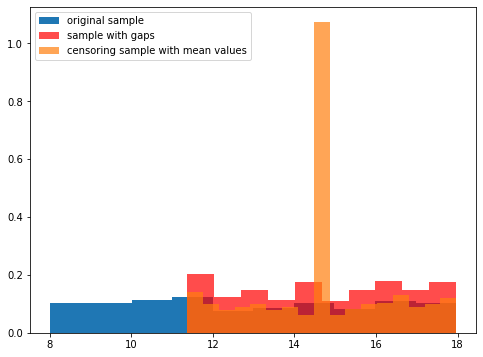

In [30]:
plt.figure(figsize = (8,6))
plt.hist(original_sample, bins = 'auto', alpha = 1.0, label = 'original sample', density = True)
plt.hist(sample, bins = 'auto', alpha = 0.7, color = 'red', label = 'sample with gaps', density = True)
plt.hist(cens_sample_with_mean_values, bins = 'auto', alpha = 0.7, label = 'censoring sample with mean values', density = True)
plt.legend(loc = 'upper left');